<a href="https://colab.research.google.com/github/ragaashritha/Prpject-5/blob/master/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Summary#
#Image enormalization
#Activation layer after Batch normalization
#Adding l2 regularization to each layer
#Misclassified images

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


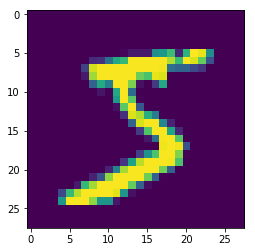

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
image_normalization = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_normalization.fit(X_train)
train_iterator = image_normalization.flow(X_train,Y_train,batch_size = 64)
test_iterator = image_normalization.flow(X_test,Y_test,batch_size = 64)

In [16]:
from keras.layers import Activation
from keras.regularizers import l2

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activity_regularizer=l2(0.0001), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))


model.add(Convolution2D(15, 3, 3, activity_regularizer=l2(0.0001))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))


model.add(Convolution2D(26, 3, 3, activity_regularizer=l2(0.0001))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))


model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) # 11
model.add(Dropout(0.10))


model.add(Convolution2D(15, 3, 3, activity_regularizer=l2(0.0001))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))


model.add(Convolution2D(26, 3, 3,  activity_regularizer=l2(0.0001))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))



model.add(Convolution2D(10, 1,activity_regularizer=l2(0.0001))) #7
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activity_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activity_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (3, 3), activity_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activity_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 15)        1365      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 15)        60        
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 15)        0         
__________

In [17]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import LearningRateScheduler,ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.007 * 1/(1 + 0.319 * epoch), 10)

model_path = 'model.{epoch:02d}-{val_loss:.2f}.hdf5'
callbacks = [
    LearningRateScheduler(scheduler, verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.007), metrics=['accuracy'])


model.fit_generator(train_iterator,epochs=40, verbose=1,steps_per_epoch=len(train_iterator),validation_data=test_iterator,validation_steps = len(test_iterator), callbacks=callbacks)


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.007.
938/938 [==============================] - 551s 588ms/step - loss: 1.6416 - acc: 0.8385 - val_loss: 0.6138 - val_acc: 0.8128
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0053070508.
938/938 [==============================] - 540s 576ms/step - loss: 0.2729 - acc: 0.9313 - val_loss: 8.7472 - val_acc: 0.6234
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0042735043.
938/938 [==============================] - 541s 577ms/step - loss: 0.2213 - acc: 0.9495 - val_loss: 0.4614 - val_acc: 0.8884
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0035769034.
938/938 [==============================] - 537s 572ms/step - loss: 0.1637 - acc: 0.9569 - val_loss: 0.1178 - val_acc: 0.9748
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0030755712.
938/938 [==============================] - 543s 579ms/step - loss: 0.1403 - a

In [0]:

from keras.models import load_model 
final_model = load_model('model.23-0.06.hdf5')

score = final_model.evaluate_generator(test_iterator,steps=len(test_iterator))
print(score)


In [0]:
y_pred = model.predict(X_test)

In [0]:
test_class =  model.predict_classes(X_test)

In [0]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


In [0]:
print(test_class[:10])

[7 2 1 0 4 1 4 4 5 9]


In [0]:
Y_test[test_class!=y_test]

AttributeError: ignored